In [1]:
import numpy as np
from runme import reproduce_pantheon_constraints, plot_markov_chain, histogram_H0

# Group 2: Results and Plots
## Table Of Contents
1. Requested Graphs
2. Our Code Structure
3. Mid-Level Calls

# 1) Requested Graphs
## Reproducing the Pantheon Constraints, Including Systematic Errors

Calling the function `reproduce_pantheon_constraints` will produce a scatter plot of two elements of the Markov chain living in `adam/chain.pickle`. These two elements are omega_lambda and omega_m--we suppress knowledge of H0, the Hubble constant, here. This Markov chain has been previously generated--to see how to generate a Markov chain here, see section 3 on mid-level calls.

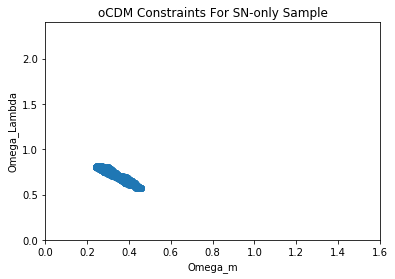

In [2]:
my_chain = reproduce_pantheon_constraints()

Here we have around 1500 elements of a Markov chain. Though it's difficult to tell from this plot, the data does stay contained in this general area as N increases.

Notably, this distribution doesn't quite match that of the paper. $\Omega_\lambda$ and $\Omega_m$ do seem to have converged. We can examine the trace plot to see this:

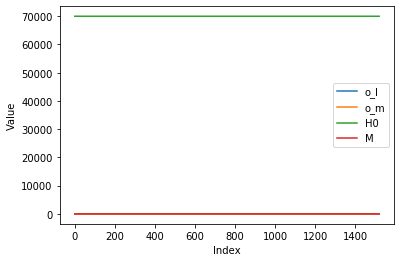

In [6]:
plot_markov_chain(my_chain)

(There doesn't seem to be a way to make this plot zoomable in Jupyter Notebook--feel free to call this function in `runme.py` to see for yourself!)

## Reproducing the Pantheon Constraints, round 2: Not including systematic errors

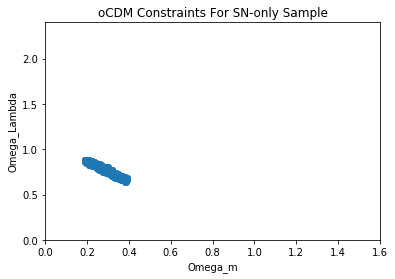

In [7]:
no_system_error_chain = reproduce_pantheon_constraints(sys=0) #Toggling the inclusion of systematic errors OFF

Again, we've got around 1500 points here. The distribution seems to have shifted slightly up and to the left.

## Plotting a distribution of the Hubble Constant, $H_0$

Similarly, we can plot the component of the Markov chain corresponding to the Hubble constant, this time as a discretized distribution (histogram):

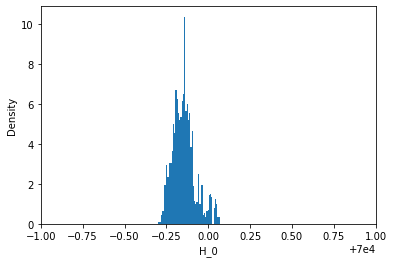

In [5]:
histogram_H0(my_chain)

# 2) Our Code Structure and Division of Labor

The code has one major directory: `local_code`. Within `local_code`, there are several files produced by each of us. They interface at the top level directory via grow_chain, playground_adam, and runme.py.

Roughly speaking, Junying was responsible for writing likelihood-computation code, Pritom was responible for writing the code to produce MC Markov Chains and confirm convergence, and Adam (hello!) was responsible for generating guesses and doing visualization. As a matter of practice, Adam took on the originally-overlooked tasks of producing a save/load system for Markov chains, which take a while to generate, and putting together this final (hopefully cohesive) product.

# 3) Mid-Level Calls

To produce a Markov chain, head over to grow_chain.py. Running this script enables you to add `n_new_elements` members to a the current Markov chain. You can choose to increase the length of either chain: with-or-without systematic error inclusion. This is done by toggling `include_systematic_errors`. The chain will automatically be saved in the `local_code/adam` directory. Be warned: due to the compute-intensive `likelihood.py`, it takes a little under a second to generate a single new element for the Markov chain. Appending 100-200 samples at a time is the way to go.

Junying put together the primary tester for the likelihood function, `test_likelihood.py`. (Unfortunately, we were still unable to converge to the distribution in the paper in time for submission.)



# Thanks for visiting!

We hope you've enjoyed tooling around with our MCMC code. 